## Refine date parsing

### Subtask:
Ensure the date parsing is handled efficiently and correctly, potentially using `pd.to_datetime` with the `date_format` argument if applicable.


**Reasoning**:
Remove the unnecessary parser function and update the read_csv call to use date_format for efficient date parsing as per the instructions.



In [ ]:
#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_format='%Y-%m-%d')

# Display the first few rows
display(catfish_sales.head())

# Display concise information about the DataFrame
display(catfish_sales.info())

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1986-01-01 to 2012-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   324 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


None

## Organize data manipulation

### Subtask:
Group code cells that perform data manipulation steps, such as calculating the first difference and selecting a subset of data.


**Reasoning**:
Group the code for defining the date range, selecting the subset, and calculating the first difference into a single cell.



In [ ]:
start_date = datetime(2000,1,1)
end_date = datetime(2004,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

first_diff = lim_catfish_sales.diff()[1:]

## Consolidate plotting code

### Subtask:
Combine plotting code for similar visualizations (e.g., the original series and the first difference) where appropriate, or ensure plotting code is self-contained within cells.


**Reasoning**:
Combine the plotting code for the original series and the first difference into separate, self-contained cells, ensuring each plot has a title, y-axis label, vertical lines for years, and a horizontal line for the mean.



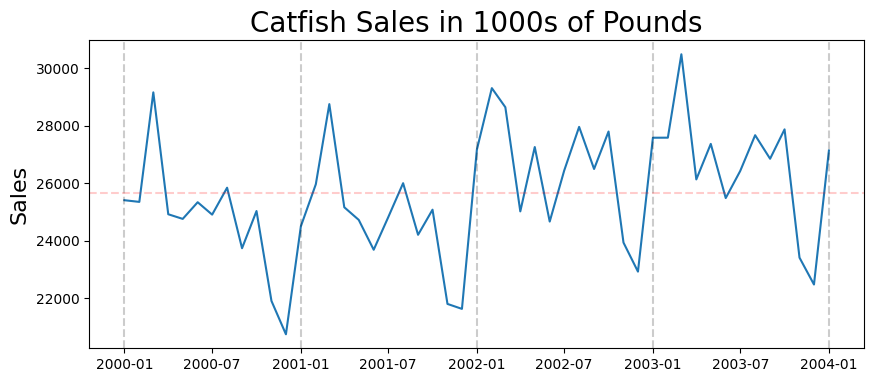

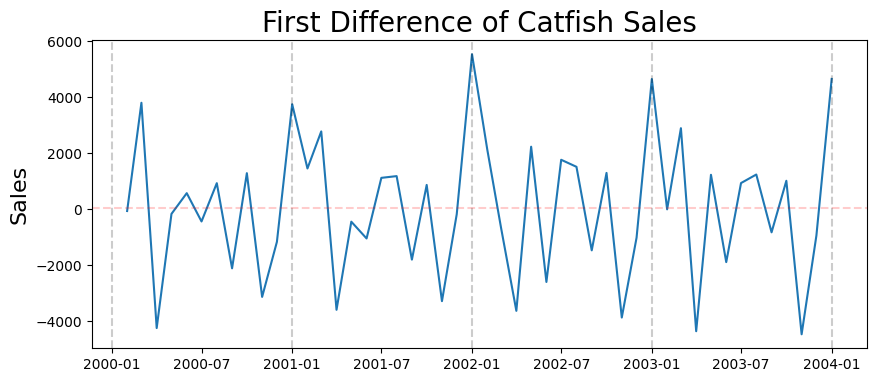

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year + 1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_catfish_sales.mean().item(), color='r', alpha=0.2, linestyle='--')

plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year + 1):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff.mean().item(), color='r', alpha=0.2, linestyle='--')

## Organize model fitting and evaluation

### Subtask:
Group the code for defining, fitting, and evaluating the ARIMA model.


**Reasoning**:
Combine all the code related to defining, fitting, and evaluating the ARIMA model into a single code block as requested.



Model Fitting Time: 0.858351469039917
                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -376.598
Date:                Sun, 19 Oct 2025   AIC                            767.195
Time:                        15:09:02   BIC                            779.359
Sample:                    02-01-2000   HQIC                           771.654
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1795    179.935      0.134      0.893    -328.487     376.846
ar.L1         -0.8659      0.222     -3.896      0.000      -1.302      -0.430
ar.L2         

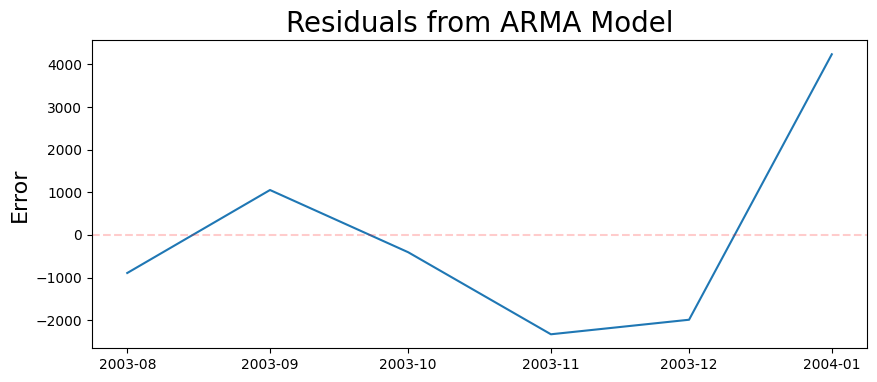

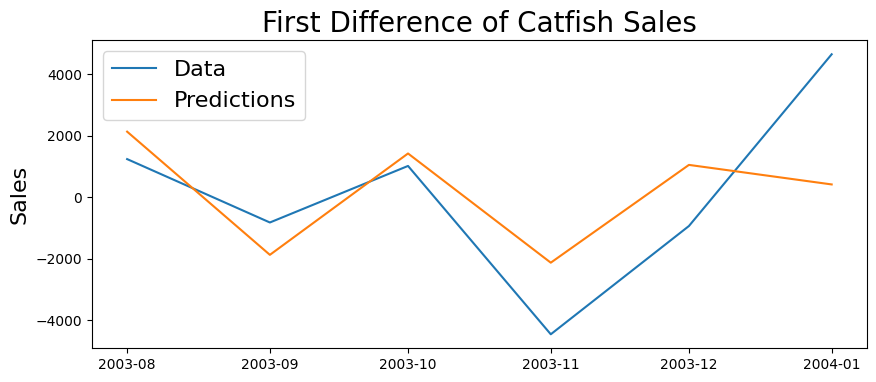

In [ ]:
# define model
model = ARIMA(train_data, order=(4,0,1))

#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

#summary of the model
print(model_fit.summary())

#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Total'] - predictions

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

## Review and remove redundant code

### Subtask:
Identify and remove any repetitive or unnecessary code across the notebook.


## Add comments and markdown

### Subtask:
Add comments to explain complex code sections and markdown cells to provide context and descriptions of the analysis steps.


**Reasoning**:
Add markdown cells and comments to explain the analysis steps, model, and results.



In [ ]:
# Read the catfish sales data from the CSV file.
# The 'Date' column is parsed as dates and set as the index.
# The frequency of the time series is inferred and set.
# This ensures the data is in a time series format with a proper datetime index.

# Select a subset of the data for analysis from 2000 to 2003 (inclusive of 2000, exclusive of 2004).
# This is done to focus on a specific period for modeling and prediction.

# Calculate the first difference of the limited sales data.
# Taking the first difference helps to make the time series stationary, which is often required for ARIMA modeling.
# The [1:] is used to remove the first NaN value resulting from the differencing operation.

# Plot the original limited catfish sales data.
# This visualization helps to understand the trend and seasonality of the original time series.

# Plot the first difference of the limited catfish sales data.
# This plot shows the changes in sales from one period to the next and helps to assess stationarity.

# Calculate the Autocorrelation Function (ACF) of the first difference.
# The ACF measures the correlation between a time series and its lagged values.
# It helps in identifying the order of the Moving Average (MA) part of an ARIMA model.

# Plot the ACF values.
# The bar plot visually represents the ACF at different lags.
# Significant spikes in the ACF indicate potential MA terms.

# Calculate the Partial Autocorrelation Function (PACF) of the first difference.
# The PACF measures the correlation between a time series and its lagged values after removing the effects of the intermediate lags.
# It helps in identifying the order of the Autoregressive (AR) part of an ARIMA model.

# Plot the PACF values.
# The bar plot visually represents the PACF at different lags.
# Significant spikes in the PACF indicate potential AR terms.

# Split the first differenced data into training and testing sets.
# The training data is used to fit the ARIMA model, and the testing data is used to evaluate its performance.

# Define the ARIMA model with order (4,0,1).
# Based on the ACF and PACF plots, an ARIMA(4,0,1) model was chosen.
# (4: AR order, 0: differencing order, 1: MA order)

# Fit the ARIMA model to the training data.
# This step involves estimating the model parameters based on the training data.

# Print the summary of the fitted model.
# The summary provides details about the model's coefficients, standard errors, p-values, and diagnostic statistics.

# Get the start and end dates for making predictions on the test data.

# Generate predictions using the fitted model on the test data.
# Calculate the residuals (the difference between the actual test data and the predictions).

# Plot the residuals.
# A plot of the residuals helps to check if the model has captured most of the patterns in the data.
# Randomly distributed residuals around zero suggest a good fit.

# Plot the actual test data and the model's predictions.
# This visualization allows for a direct comparison between the actual values and the predicted values on the test set.

# Calculate and print the Root Mean Squared Error (RMSE) of the predictions.
# RMSE is a common metric to evaluate the accuracy of a time series forecasting model.
# A lower RMSE indicates better model performance.

**Reasoning**:
Add markdown cells to provide context and descriptions of the analysis steps.



In [ ]:
# Catfish Sales Data Analysis

# This notebook performs a time series analysis on catfish sales data.
# The goal is to understand the patterns in the data and build a model to forecast future sales.

# ## Data Loading and Initial Inspection
# The data is loaded from a CSV file, and the 'Date' column is parsed as a datetime index.
# We then inspect the first few rows and the data types to ensure the data is loaded correctly.

# ## Data Manipulation and Visualization
# To focus on a specific period and make the time series stationary, we select a subset of the data and calculate the first difference.
# The original and differenced series are then plotted to visualize the transformations and identify patterns like trend and seasonality.

# ## Autocorrelation and Partial Autocorrelation Analysis
# The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of the first difference are calculated and plotted.
# These plots help in identifying the order (p and q) of the AR and MA components of an ARIMA model.

# ## Model Definition, Fitting, and Evaluation
# Based on the ACF and PACF plots, an ARIMA model is defined with appropriate orders.
# The model is then fitted to the training data.
# The model's summary is printed to evaluate the significance of the coefficients and check diagnostic statistics.
# Predictions are made on the test data, and the residuals are calculated.
# The residuals and the actual vs. predicted values are plotted to assess the model's performance.
# Finally, the Root Mean Squared Error (RMSE) is calculated to quantify the model's prediction accuracy.

Model Time: 1.885035753250122
                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -376.598
Date:                Sun, 19 Oct 2025   AIC                            767.195
Time:                        15:18:36   BIC                            779.359
Sample:                    02-01-2000   HQIC                           771.654
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1795    179.935      0.134      0.893    -328.487     376.846
ar.L1         -0.8659      0.222     -3.896      0.000      -1.302      -0.430
ar.L2         -0.4234 

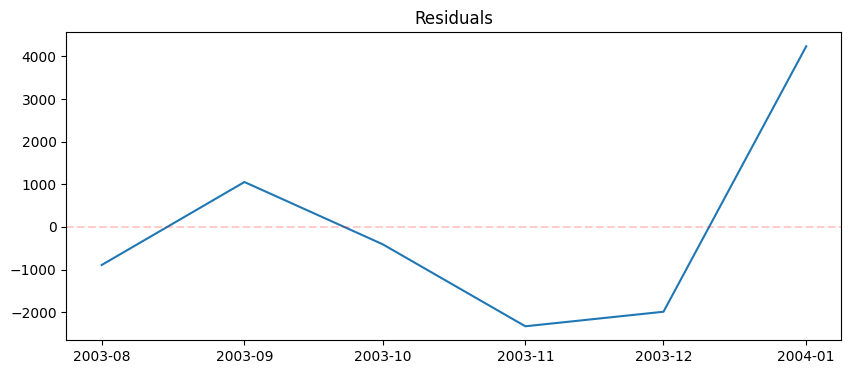

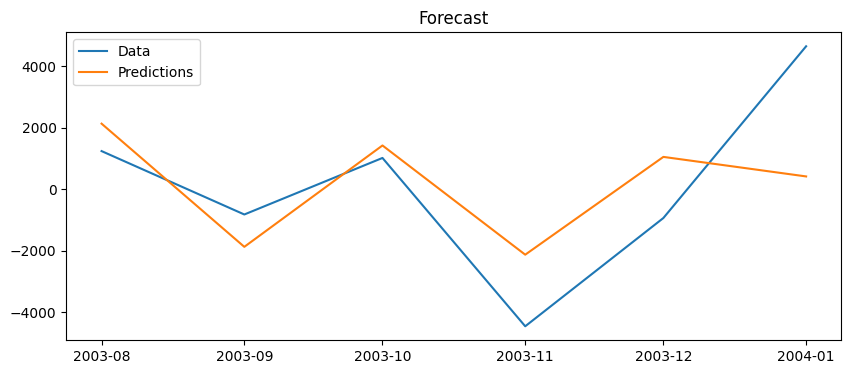

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time

# 1) Load data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0)

# 2) Set frequency and filter dates
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))
start_date, end_date = datetime(2000,1,1), datetime(2004,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

# 3) First difference
first_diff = lim_catfish_sales.diff().dropna()

# 4) Split into train / test
train_end, test_end = datetime(2003,7,1), datetime(2004,1,1)
train_data = first_diff[:train_end]
test_data  = first_diff[train_end + timedelta(days=1):test_end]

# 5) Fit ARIMA model
start = time()
model_fit = ARIMA(train_data, order=(4,0,1)).fit()
print("Model Time:", time()-start)
print(model_fit.summary())

# 6) Forecast & residuals
pred = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
residuals = test_data.squeeze() - pred  # إذا كانت DataFrame خليها Series

# 7) Plot residuals & forecast
plt.figure(figsize=(10,4)); plt.plot(residuals); plt.axhline(0, color='r', linestyle='--', alpha=0.2); plt.title("Residuals")
plt.figure(figsize=(10,4)); plt.plot(test_data, label="Data"); plt.plot(pred, label="Predictions"); plt.legend(); plt.title("Forecast")
print("RMSE:", np.sqrt(np.mean(residuals**2)))
